In [1]:
### import manually defined automata
%matplotlib inline
from csrl.pomdp import GridPOMDP
from csrl.oaa import oaa
from csrl import ControlSynthesis
import numpy as np 

oa=oaa()

# LTL Specification
#ltl = '(GFa & GFb) & G!c' ### goes to 'a', 'b' recurrently, gallobly ! c

# Translate the LTL formula to an LDBA
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

print('Initial state:',oa.q0)
print('Transition function: ['),print(*['  '+str(t) for t in oa.delta],sep=',\n'),print(']')
print('Acceptance: ['),print(*['  '+str(t) for t in oa.acc],sep=',\n'),print(']')

Number of Omega-automaton states (including the trap state): 3


Initial state: 0
Transition function: [
  {(): 0, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 1, ('a',): 1, ('b',): 0, ('c',): 2, ('a', 'b'): 0, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2},
  {(): 2, ('a',): 2, ('b',): 2, ('c',): 2, ('a', 'b'): 2, ('a', 'c'): 2, ('b', 'c'): 2, ('a', 'b', 'c'): 2}
]
Acceptance: [
  {(): [None], ('a',): [True], ('b',): [True], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [True], ('b',): [True], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]},
  {(): [None], ('a',): [None], ('b',): [None], ('c',): [None], ('a', 'b'): [None], ('a', 'c'): [None], ('b', 'c'): [None], ('a', 'b', 'c'): [None]}
]


(None, None, None)

In [2]:
# POMDP Description
shape = (10,10)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'B',  'B',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E',  'E']
])

# Labels of the states
label = np.array([
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       (),       (),       (),       (),       (),       (),       ('b',),       ('b',)],
[(),       (),       ('c',),       ('c',),       (),       (),       (),       (),       (),       ()],
[(),       (),       ('c',),       ('c',),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       (),       (),       (),       ()],
[(),       (),       (),       (),       (),       (),       ('c',),       ('c',),       (),       ()],
[(),       (),       (),       (),       (),       (),       ('c',),       ('c',),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()],
[('a',),       ('a',),       (),       (),       (),       (),       (),       (),       (),       ()]
],dtype=np.object)

grid_pomdp = GridPOMDP(shape=shape,structure=structure,label=label) 

# Construct the product POMDP
csrl = ControlSynthesis(grid_pomdp,oa)

C:\Users\JUNCHA~1\AppData\Local\Temp/ipykernel_22728/3991470510.py:29: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ],dtype=np.object)


In [3]:
csrl.belief_state

array([[[[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01],
         [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]],

        [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
    

In [4]:
csrl.A

array([[[[list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([

In [5]:
csrl.reward

array([[[[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [10., 10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

        [[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10., 10.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
         [ 0.,  0.,  0

In [6]:
exploration_rate, t2, accumulated_rewards = csrl.train_DQN(EPISODES=8000,num_steps=500) #8000, 500

D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


episode: 0/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.113630712032318
episode: 1/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.034545958042144775
episode: 2/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 1.2063665390014648
episode: 3/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 4/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.019311487674713135
episode: 5/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 1.1920928955078125e-07
episode: 6/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 7/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.50568550825119
episode: 8/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 9/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 10/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.294707298278809
episode: 11/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1

episode: 101/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 102/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 103/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.410891354084015
episode: 104/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 105/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.6875
episode: 106/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 8.21677017211914
episode: 107/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 108/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 109/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.30908203125
episode: 110/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.1285400390625
episode: 111/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 112/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.989158630371094
episode: 113/8000, steps: 500, 

episode: 201/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.429931640625
episode: 202/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.992632925510406
episode: 203/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 204/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 205/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 6.771087646484375e-05
episode: 206/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.98899132013321
episode: 207/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 2.8100587725639343
episode: 208/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 209/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 210/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 211/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 212/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 213/8000, steps: 50

episode: 302/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 20.357598066329956
episode: 303/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.984484374523163
episode: 304/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 305/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 306/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 307/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 308/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 309/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 310/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.225018799304962
episode: 311/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.976673305034637
episode: 312/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 313/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 8.27685546875
episode: 314/8000, steps: 500, e

episode: 402/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 403/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 404/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.957256317138672
episode: 405/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 406/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 407/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 7.196963846683502
episode: 408/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 15.144320905208588
episode: 409/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 410/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 411/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 8.007675170898438
episode: 412/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 413/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 414/8000, steps: 500, e: 1.0
accum

episode: 504/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 505/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.070114016532898
episode: 506/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.00021904706954956055
episode: 507/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 508/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 509/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 510/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 511/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.000377297401428
episode: 512/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 513/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 514/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 515/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 516/8000, steps: 500, e: 1.0
accumulated_r

episode: 604/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.008366823196411133
episode: 605/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 606/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 607/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.1484375
episode: 608/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 609/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 610/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 611/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.013334035873413086
episode: 612/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 1.3709068298339844e-06
episode: 613/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 614/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.11762237548828125
episode: 615/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 616/8000, steps:

episode: 705/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 706/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 707/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 708/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 20.118408203125
episode: 709/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 8.180908203125
episode: 710/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.484380841255188
episode: 711/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.998784065246582
episode: 712/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.069105982780457
episode: 713/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.9765625
episode: 714/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.10160207748413
episode: 715/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 716/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 717/8

episode: 805/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 806/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 807/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 808/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 809/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 810/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 811/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.04830390214920044
episode: 812/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 813/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 814/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 815/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.782906532287598
episode: 816/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 4.511614918708801
episode: 817/8000, steps: 500, e: 1.0
accumulated_rewar

episode: 905/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 5.960464477539063e-08
episode: 906/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.97656625509262
episode: 907/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.139404296875
episode: 908/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 5.960464477539063e-08
episode: 909/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 910/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 911/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 912/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.1484375
episode: 913/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 914/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 915/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 916/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 917/8000, steps: 500, e: 

episode: 1007/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1008/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1009/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1010/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.984367370605469
episode: 1011/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1012/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1013/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1014/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 1.1920928955078125e-07
episode: 1015/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.011422574520111084
episode: 1016/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1017/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.945803463459015
episode: 1018/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 12.322265803813934
episode: 

episode: 1106/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 1.0728836059570312e-06
episode: 1107/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1108/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1109/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1110/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1111/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 9.867191314697266
episode: 1112/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.06548982858657837
episode: 1113/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 10.074422359466553
episode: 1114/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.015689611434936523
episode: 1115/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 0.0
episode: 1116/8000, steps: 500, e: 1.0
accumulated_rewards_per_episode: 7.125441193580627
episode: 1117/8000, steps: 500, e: 1.0
accumulated_rewards_per_episod

episode: 1205/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1206/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.51124632358551
episode: 1207/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 11.909952878952026
episode: 1208/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.124755859375
episode: 1209/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1210/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.976842403411865
episode: 1211/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.890820860862732
episode: 1212/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1213/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.297340393066406
episode: 1214/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1215/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1216/8000, steps: 500, e: 0.99
accumulated_rewards_per_episod

episode: 1302/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1303/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.268836975097656
episode: 1304/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1305/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 2.7857515811920166
episode: 1306/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1307/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1308/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.981056451797485
episode: 1309/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0002047419548034668
episode: 1310/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.00010091066360473633
episode: 1311/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.459447145462036
episode: 1312/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1313/8000, steps: 500, e: 0.99
accumulated_rewar

episode: 1401/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1402/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 1.4424324035644531e-05
episode: 1403/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1404/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1405/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1406/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1407/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.834203839302063
episode: 1408/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.006081998348236084
episode: 1409/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.13015258312225342
episode: 1410/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1411/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 2.0192190408706665
episode: 1412/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode:

episode: 1499/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.6875
episode: 1500/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 14.5341796875
episode: 1501/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.012321114540100098
episode: 1502/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1503/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.981517791748047
episode: 1504/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.726749241352081
episode: 1505/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.007183909416199
episode: 1506/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1507/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1508/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1509/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1510/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.1484

episode: 1597/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.97656261920929
episode: 1598/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 10.174569070339203
episode: 1599/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1600/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1601/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 19.62484782934189
episode: 1602/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1603/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.026180267333984375
episode: 1604/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1605/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.996926665306091
episode: 1606/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1607/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.996750056743622
episode: 1608/8000, steps: 500, e: 0.99
accumulated_rewards_per_ep

episode: 1695/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1696/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1697/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0030670166015625
episode: 1698/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 1.6093254089355469e-06
episode: 1699/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.945585370063782
episode: 1700/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.980411291122437
episode: 1701/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1702/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 9.976564347743988
episode: 1703/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1704/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1705/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0
episode: 1706/8000, steps: 500, e: 0.99
accumulated_rewards_per_episode: 0.0


episode: 1794/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1795/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1796/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1797/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1798/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1799/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1800/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1801/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1802/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1803/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1804/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1805/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1806/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0

episode: 1893/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1894/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 10.073106467723846
episode: 1895/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1896/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1897/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1898/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1899/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0006769895553588867
episode: 1900/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 1.5139579772949219e-05
episode: 1901/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1902/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1903/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.09607821702957153
episode: 1904/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 9.7503840923

episode: 1989/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1990/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1991/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 9.96093761920929
episode: 1992/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1993/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1994/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 9.976568698883057
episode: 1995/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1996/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1997/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 9.991958618164062
episode: 1998/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 1999/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 2000/8000, steps: 500, e: 0.98
accumulated_rewards_per_episode: 0.0
episode: 2001/8000, steps: 500, e: 

episode: 2088/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2089/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2090/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2091/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2092/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2093/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2094/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 7.164627432823181
episode: 2095/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2096/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2097/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2098/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2099/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2100/8000, steps: 500, e: 0.97
accumulated_rewards_pe

episode: 2187/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.036648690700531006
episode: 2188/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2189/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2190/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2191/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 10.0
episode: 2192/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2193/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2194/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 10.177595674991608
episode: 2195/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2196/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2197/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.15764617919921875
episode: 2198/8000, steps: 500, e: 0.97
accumulated_rewards_per_episode: 0.0
episode: 2199/8000, steps: 

episode: 2285/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 2286/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 2287/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 2288/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 2289/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.07034933567047119
episode: 2290/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 5.960464477539063e-08
episode: 2291/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 10.08120346069336
episode: 2292/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 2293/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 11.216102600097656
episode: 2294/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 2295/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 2296/8000, steps: 500, e: 0.96
accumulated_rewards_per_episode: 0.0
episode: 2297

episode: 2384/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 10.136146545410156
episode: 2385/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 6.079673767089844e-06
episode: 2386/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 7.632816433906555
episode: 2387/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 9.976782739162445
episode: 2388/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 2389/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 2390/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 2391/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.3325424790382385
episode: 2392/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 7.5674285888671875
episode: 2393/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 2394/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 11.974456787109375
episode: 2395/8000, steps: 500, e: 0.95
accumul

episode: 2482/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0673828125
episode: 2483/8000, steps: 500, e: 0.95
accumulated_rewards_per_episode: 0.0
episode: 2484/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 2485/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 9.476825952529907
episode: 2486/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 9.976577341556549
episode: 2487/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 2488/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 2489/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 2490/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 2491/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.0
episode: 2492/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 0.002992570400238037
episode: 2493/8000, steps: 500, e: 0.94
accumulated_rewards_per_episode: 1.5497207641601562e-06
epi

episode: 2580/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 9.989176392555237
episode: 2581/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 9.991264343261719
episode: 2582/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.0128326416015625
episode: 2583/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.01540440320968628
episode: 2584/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.0
episode: 2585/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.0
episode: 2586/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 3.715331196784973
episode: 2587/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.0
episode: 2588/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.0
episode: 2589/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 0.0
episode: 2590/8000, steps: 500, e: 0.93
accumulated_rewards_per_episode: 9.97697389125824
episode: 2591/8000, steps: 500, e: 0.93
accumulated_rewards_per_epi

episode: 2678/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 0.0
episode: 2679/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 10.429931640625
episode: 2680/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 0.0
episode: 2681/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 10.004765093326569
episode: 2682/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 0.0
episode: 2683/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 0.0
episode: 2684/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 0.0002224445343017578
episode: 2685/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 9.97703742980957
episode: 2686/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 0.0
episode: 2687/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 8.32918119430542
episode: 2688/8000, steps: 500, e: 0.92
accumulated_rewards_per_episode: 10.017482161521912
episode: 2689/8000, steps: 500, e: 0.92
accumulated_rewards_per_epi

episode: 2774/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.482776403427124
episode: 2775/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2776/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2777/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 7.171876609325409
episode: 2778/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2779/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2780/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2781/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 12.797639548778534
episode: 2782/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2783/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 9.098824918270111
episode: 2784/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2785/8000, steps: 500, e: 0.91
accumulated_rewards_per_episode: 0.0
episode: 2786/8000,

episode: 2872/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 0.0
episode: 2873/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 0.00010985136032104492
episode: 2874/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 0.0
episode: 2875/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 0.0
episode: 2876/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 0.0
episode: 2877/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 7.0552204847335815
episode: 2878/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 9.945622742176056
episode: 2879/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 8.534183502197266
episode: 2880/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 0.0
episode: 2881/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 10.01662302017212
episode: 2882/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 0.0
episode: 2883/8000, steps: 500, e: 0.89
accumulated_rewards_per_episode: 1.25

episode: 2968/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 0.0
episode: 2969/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 1.9775662422180176
episode: 2970/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 0.0
episode: 2971/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 9.97656625509262
episode: 2972/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 0.04286813735961914
episode: 2973/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 0.0
episode: 2974/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 1.813856303691864
episode: 2975/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 9.988977134227753
episode: 2976/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 9.984776318073273
episode: 2977/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 9.918749511241913
episode: 2978/8000, steps: 500, e: 0.87
accumulated_rewards_per_episode: 0.0
episode: 2979/8000, steps: 500, e: 0.87
accumulated_r

episode: 3065/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 8.132818579673767
episode: 3066/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 7.156846821308136
episode: 3067/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 10.008424639701843
episode: 3068/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 9.882816851139069
episode: 3069/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 0.0
episode: 3070/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 9.445100128650665
episode: 3071/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 8.293473839759827
episode: 3072/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 2.181529998779297e-05
episode: 3073/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 9.6875
episode: 3074/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 0.0
episode: 3075/8000, steps: 500, e: 0.85
accumulated_rewards_per_episode: 0.0
episode: 3076/8000, steps: 500, e: 0.85
accumul

episode: 3161/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 0.0
episode: 3162/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 0.0
episode: 3163/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 1.9785089492797852
episode: 3164/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 9.353209614753723
episode: 3165/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 9.976671874523163
episode: 3166/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 0.0
episode: 3167/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 9.976671874523163
episode: 3168/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 9.476666390895844
episode: 3169/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 10.273905515670776
episode: 3170/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 7.170794785022736
episode: 3171/8000, steps: 500, e: 0.83
accumulated_rewards_per_episode: 9.976571202278137
episode: 3172/8000, steps: 500, e: 0.83

episode: 3258/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 0.0
episode: 3259/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 0.0
episode: 3260/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 8.020625591278076
episode: 3261/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 0.5503196716308594
episode: 3262/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 9.491964638233185
episode: 3263/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 9.976874709129333
episode: 3264/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 10.013281404972076
episode: 3265/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 2.1278858184814453e-05
episode: 3266/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 0.0
episode: 3267/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 0.0
episode: 3268/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 0.0
episode: 3269/8000, steps: 500, e: 0.8
accumulated_rewards_per_episode: 0

episode: 3353/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 0.0
episode: 3354/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 9.4375
episode: 3355/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 0.0
episode: 3356/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 0.0
episode: 3357/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 0.0
episode: 3358/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 5.960464477539063e-08
episode: 3359/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 0.0
episode: 3360/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 0.0
episode: 3361/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 10.312016248703003
episode: 3362/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 9.993793487548828
episode: 3363/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 24.0703125
episode: 3364/8000, steps: 500, e: 0.77
accumulated_rewards_per_episode: 0.0019197463989257812
e

episode: 3449/8000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 3450/8000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 3451/8000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 9.734026670455933
episode: 3452/8000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 3453/8000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 10.026956260204315
episode: 3454/8000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 3455/8000, steps: 500, e: 0.74
accumulated_rewards_per_episode: 0.0
episode: 3456/8000, steps: 500, e: 0.73
accumulated_rewards_per_episode: 9.984375
episode: 3457/8000, steps: 500, e: 0.73
accumulated_rewards_per_episode: 1.0728836059570312e-06
episode: 3458/8000, steps: 500, e: 0.73
accumulated_rewards_per_episode: 9.977779865264893
episode: 3459/8000, steps: 500, e: 0.73
accumulated_rewards_per_episode: 9.992692589759827
episode: 3460/8000, steps: 500, e: 0.73
accumulated_rewards_per_episode:

episode: 3545/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 0.06890654563903809
episode: 3546/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 0.0
episode: 3547/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 0.0
episode: 3548/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 9.9765625
episode: 3549/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 10.104968070983887
episode: 3550/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 0.0006254315376281738
episode: 3551/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 0.0
episode: 3552/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 0.0
episode: 3553/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 9.982486724853516
episode: 3554/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 9.976840019226074
episode: 3555/8000, steps: 500, e: 0.7
accumulated_rewards_per_episode: 10.012760281562805
episode: 3556/8000, steps: 500, e: 0.7
accumulated_rewards_per_epi

episode: 3638/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 9.976675152778625
episode: 3639/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 0.0
episode: 3640/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 9.992248058319092
episode: 3641/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 9.67995309829712
episode: 3642/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 1.807861328125
episode: 3643/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 9.985055208206177
episode: 3644/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 9.988984405994415
episode: 3645/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 0.0
episode: 3646/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 1.9780882000923157
episode: 3647/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 9.981369197368622
episode: 3648/8000, steps: 500, e: 0.66
accumulated_rewards_per_episode: 0.0
episode: 3649/8000, steps: 500, e: 0.66
accu

episode: 3731/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 0.0
episode: 3732/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 10.505384087562561
episode: 3733/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 0.11892282962799072
episode: 3734/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 9.546875
episode: 3735/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 10.01797366142273
episode: 3736/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 0.0
episode: 3737/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 9.976836204528809
episode: 3738/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 0.0
episode: 3739/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 9.96875
episode: 3740/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 9.48403775691986
episode: 3741/8000, steps: 500, e: 0.62
accumulated_rewards_per_episode: 0.5942011475563049
episode: 3742/8000, steps: 500, e: 0.62
accumulated_rewar

episode: 3827/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 3828/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 3829/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 9.996856808662415
episode: 3830/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 3831/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 1.9419309496879578
episode: 3832/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 10.000436782836914
episode: 3833/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 10.000699520111084
episode: 3834/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 9.890931606292725
episode: 3835/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.010229289531707764
episode: 3836/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 7.648773670196533
episode: 3837/8000, steps: 500, e: 0.58
accumulated_rewards_per_episode: 0.0
episode: 3838/8000, steps: 500, e: 0.58
accumulat

episode: 3920/8000, steps: 500, e: 0.54
accumulated_rewards_per_episode: 4.023576259613037
episode: 3921/8000, steps: 500, e: 0.54
accumulated_rewards_per_episode: 10.52622675895691
episode: 3922/8000, steps: 500, e: 0.54
accumulated_rewards_per_episode: 10.118408203125
episode: 3923/8000, steps: 500, e: 0.54
accumulated_rewards_per_episode: 10.006229400634766
episode: 3924/8000, steps: 500, e: 0.54
accumulated_rewards_per_episode: 9.9765625
episode: 3925/8000, steps: 500, e: 0.54
accumulated_rewards_per_episode: 8.710542261600494
episode: 3926/8000, steps: 500, e: 0.53
accumulated_rewards_per_episode: 0.0
episode: 3927/8000, steps: 500, e: 0.53
accumulated_rewards_per_episode: 0.0
episode: 3928/8000, steps: 500, e: 0.53
accumulated_rewards_per_episode: 9.96875
episode: 3929/8000, steps: 500, e: 0.53
accumulated_rewards_per_episode: 24.97695940732956
episode: 3930/8000, steps: 500, e: 0.53
accumulated_rewards_per_episode: 0.0
episode: 3931/8000, steps: 500, e: 0.53
accumulated_rewards_

episode: 4014/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 0.03340017795562744
episode: 4015/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 9.98426902294159
episode: 4016/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 0.0
episode: 4017/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 9.9609375
episode: 4018/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 9.997188031673431
episode: 4019/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 9.983383178710938
episode: 4020/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 9.992103576660156
episode: 4021/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 9.976836204528809
episode: 4022/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 7.17958676815033
episode: 4023/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 9.984375
episode: 4024/8000, steps: 500, e: 0.49
accumulated_rewards_per_episode: 0.013828396797180176
episode: 4025/8000, steps: 

episode: 4107/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 0.5090016722679138
episode: 4108/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 9.484375
episode: 4109/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 33.62196218967438
episode: 4110/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 0.0
episode: 4111/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 37.10023444890976
episode: 4112/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 10.106414794921875
episode: 4113/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 9.988815307617188
episode: 4114/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 9.945598363876343
episode: 4115/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 9.9765625
episode: 4116/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 10.00467073917389
episode: 4117/8000, steps: 500, e: 0.45
accumulated_rewards_per_episode: 12.855665802955627
episode: 4118/8000, steps: 

episode: 4199/8000, steps: 500, e: 0.41
accumulated_rewards_per_episode: 9.988781094551086
episode: 4200/8000, steps: 500, e: 0.41
accumulated_rewards_per_episode: 9.976836204528809
episode: 4201/8000, steps: 500, e: 0.41
accumulated_rewards_per_episode: 9.976965188980103
episode: 4202/8000, steps: 500, e: 0.41
accumulated_rewards_per_episode: 19.174817740917206
episode: 4203/8000, steps: 500, e: 0.41
accumulated_rewards_per_episode: 0.0
episode: 4204/8000, steps: 500, e: 0.41
accumulated_rewards_per_episode: 24.63473552465439
episode: 4205/8000, steps: 500, e: 0.41
accumulated_rewards_per_episode: 10.25341796875
episode: 4206/8000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 8.74755859375
episode: 4207/8000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 0.0
episode: 4208/8000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 39.92177331447601
episode: 4209/8000, steps: 500, e: 0.4
accumulated_rewards_per_episode: 0.0
episode: 4210/8000, steps: 500, e: 0.4
accumulated_

episode: 4292/8000, steps: 500, e: 0.37
accumulated_rewards_per_episode: 0.0
episode: 4293/8000, steps: 500, e: 0.37
accumulated_rewards_per_episode: 1.8997759819030762
episode: 4294/8000, steps: 500, e: 0.37
accumulated_rewards_per_episode: 20.697469472885132
episode: 4295/8000, steps: 500, e: 0.37
accumulated_rewards_per_episode: 9.990710735321045
episode: 4296/8000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 0.0
episode: 4297/8000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 10.0589599609375
episode: 4298/8000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 19.953159391880035
episode: 4299/8000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 19.91809904575348
episode: 4300/8000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 30.42021906375885
episode: 4301/8000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 0.0
episode: 4302/8000, steps: 500, e: 0.36
accumulated_rewards_per_episode: 42.63993418216705
episode: 4303/8000, steps: 500, e: 0.36

episode: 4385/8000, steps: 500, e: 0.33
accumulated_rewards_per_episode: 38.35832226276398
episode: 4386/8000, steps: 500, e: 0.33
accumulated_rewards_per_episode: 19.961689889431
episode: 4387/8000, steps: 500, e: 0.33
accumulated_rewards_per_episode: 9.6875
episode: 4388/8000, steps: 500, e: 0.33
accumulated_rewards_per_episode: 76.89861488342285
episode: 4389/8000, steps: 500, e: 0.33
accumulated_rewards_per_episode: 9.98440170288086
episode: 4390/8000, steps: 500, e: 0.32
accumulated_rewards_per_episode: 119.72870099544525
episode: 4391/8000, steps: 500, e: 0.32
accumulated_rewards_per_episode: 18.779884934425354
episode: 4392/8000, steps: 500, e: 0.32
accumulated_rewards_per_episode: 0.0
episode: 4393/8000, steps: 500, e: 0.32
accumulated_rewards_per_episode: 23.0811767578125
episode: 4394/8000, steps: 500, e: 0.32
accumulated_rewards_per_episode: 72.13231945037842
episode: 4395/8000, steps: 500, e: 0.32
accumulated_rewards_per_episode: 0.001918792724609375
episode: 4396/8000, ste

episode: 4478/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 75.491808116436
episode: 4479/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 38.07812964916229
episode: 4480/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 19.953615307807922
episode: 4481/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 92.68349552154541
episode: 4482/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 28.320260286331177
episode: 4483/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 75.03587979078293
episode: 4484/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 27.72140336036682
episode: 4485/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 165.18497508764267
episode: 4486/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 31.98391169309616
episode: 4487/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 18.68760985136032
episode: 4488/8000, steps: 500, e: 0.29
accumulated_rewards_per_episode: 98.0430834293365

episode: 4570/8000, steps: 500, e: 0.26
accumulated_rewards_per_episode: 31.05588734149933
episode: 4571/8000, steps: 500, e: 0.26
accumulated_rewards_per_episode: 28.47660356760025
episode: 4572/8000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 69.81114453077316
episode: 4573/8000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 130.97745525836945
episode: 4574/8000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 19.449493408203125
episode: 4575/8000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 71.14690774679184
episode: 4576/8000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 65.91297245025635
episode: 4577/8000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 32.79777693748474
episode: 4578/8000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 83.15377163887024
episode: 4579/8000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 16.58609902858734
episode: 4580/8000, steps: 500, e: 0.25
accumulated_rewards_per_episode: 80.105086326599

episode: 4662/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 171.16350507736206
episode: 4663/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 89.67570704221725
episode: 4664/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 0.0
episode: 4665/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 12.75977349281311
episode: 4666/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 2.6352899074554443
episode: 4667/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 42.04672312736511
episode: 4668/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 0.31787109375
episode: 4669/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 72.8924201130867
episode: 4670/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 112.8468120098114
episode: 4671/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 49.551650166511536
episode: 4672/8000, steps: 500, e: 0.22
accumulated_rewards_per_episode: 32.05498963594437
episode: 4673/8

episode: 4755/8000, steps: 500, e: 0.2
accumulated_rewards_per_episode: 21.63974767923355
episode: 4756/8000, steps: 500, e: 0.2
accumulated_rewards_per_episode: 99.32095402479172
episode: 4757/8000, steps: 500, e: 0.19
accumulated_rewards_per_episode: 2.5480422973632812
episode: 4758/8000, steps: 500, e: 0.19
accumulated_rewards_per_episode: 10.106414794921875
episode: 4759/8000, steps: 500, e: 0.19
accumulated_rewards_per_episode: 53.049395978450775
episode: 4760/8000, steps: 500, e: 0.19
accumulated_rewards_per_episode: 52.36748057603836
episode: 4761/8000, steps: 500, e: 0.19
accumulated_rewards_per_episode: 49.46570682525635
episode: 4762/8000, steps: 500, e: 0.19
accumulated_rewards_per_episode: 133.092180788517
episode: 4763/8000, steps: 500, e: 0.19
accumulated_rewards_per_episode: 19.959945678710938
episode: 4764/8000, steps: 500, e: 0.19
accumulated_rewards_per_episode: 143.32761496305466
episode: 4765/8000, steps: 500, e: 0.19
accumulated_rewards_per_episode: 121.45358544588

episode: 4847/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 87.39175713062286
episode: 4848/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 18.962483525276184
episode: 4849/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 44.77337408065796
episode: 4850/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 112.11462253332138
episode: 4851/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 55.73124796152115
episode: 4852/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 111.79934448003769
episode: 4853/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 100.00562173128128
episode: 4854/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 0.0
episode: 4855/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 129.44738978147507
episode: 4856/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 185.21404641866684
episode: 4857/8000, steps: 500, e: 0.17
accumulated_rewards_per_episode: 172.84268736839294
episod

episode: 4939/8000, steps: 500, e: 0.15
accumulated_rewards_per_episode: 50.7195121049881
episode: 4940/8000, steps: 500, e: 0.15
accumulated_rewards_per_episode: 10.000000059604645
episode: 4941/8000, steps: 500, e: 0.15
accumulated_rewards_per_episode: 128.84861093759537
episode: 4942/8000, steps: 500, e: 0.15
accumulated_rewards_per_episode: 48.84022521972656
episode: 4943/8000, steps: 500, e: 0.15
accumulated_rewards_per_episode: 61.33199179172516
episode: 4944/8000, steps: 500, e: 0.15
accumulated_rewards_per_episode: 69.17190873622894
episode: 4945/8000, steps: 500, e: 0.15
accumulated_rewards_per_episode: 69.66040068864822
episode: 4946/8000, steps: 500, e: 0.15
accumulated_rewards_per_episode: 150.19495582580566
episode: 4947/8000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 9.982486724853516
episode: 4948/8000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 10.42461359500885
episode: 4949/8000, steps: 500, e: 0.14
accumulated_rewards_per_episode: 47.535143315792

episode: 5030/8000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 129.16922277212143
episode: 5031/8000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 202.25496262311935
episode: 5032/8000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 96.12969261407852
episode: 5033/8000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 92.06325376033783
episode: 5034/8000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 30.426789164543152
episode: 5035/8000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 99.87730312347412
episode: 5036/8000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 99.57227897644043
episode: 5037/8000, steps: 500, e: 0.13
accumulated_rewards_per_episode: 6.678070425987244
episode: 5038/8000, steps: 500, e: 0.12
accumulated_rewards_per_episode: 40.61088854074478
episode: 5039/8000, steps: 500, e: 0.12
accumulated_rewards_per_episode: 0.0
episode: 5040/8000, steps: 500, e: 0.12
accumulated_rewards_per_episode: 41.72811287641525
episode: 5

episode: 5121/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 52.106382608413696
episode: 5122/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 29.936757802963257
episode: 5123/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 89.77710121870041
episode: 5124/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 9.9765625
episode: 5125/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 20.03729248046875
episode: 5126/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 43.03318476676941
episode: 5127/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 39.91856384277344
episode: 5128/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 24.7689146399498
episode: 5129/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 29.957618713378906
episode: 5130/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 9.980493485927582
episode: 5131/8000, steps: 500, e: 0.11
accumulated_rewards_per_episode: 0.0
episode: 5132/8000,

episode: 5212/8000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 0.0
episode: 5213/8000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 76.54624551534653
episode: 5214/8000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 12.851196765899658
episode: 5215/8000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 2.7832417488098145
episode: 5216/8000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 71.92832344770432
episode: 5217/8000, steps: 500, e: 0.093
accumulated_rewards_per_episode: 127.564956843853
episode: 5218/8000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 101.06715208292007
episode: 5219/8000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 97.88121789693832
episode: 5220/8000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 144.7710525393486
episode: 5221/8000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 30.392718374729156
episode: 5222/8000, steps: 500, e: 0.092
accumulated_rewards_per_episode: 21.61387634277343

episode: 5302/8000, steps: 500, e: 0.08
accumulated_rewards_per_episode: 209.66010695695877
episode: 5303/8000, steps: 500, e: 0.08
accumulated_rewards_per_episode: 62.64482539892197
episode: 5304/8000, steps: 500, e: 0.08
accumulated_rewards_per_episode: 132.57021409273148
episode: 5305/8000, steps: 500, e: 0.08
accumulated_rewards_per_episode: 65.00732898712158
episode: 5306/8000, steps: 500, e: 0.08
accumulated_rewards_per_episode: 137.56906133890152
episode: 5307/8000, steps: 500, e: 0.079
accumulated_rewards_per_episode: 72.0706958770752
episode: 5308/8000, steps: 500, e: 0.079
accumulated_rewards_per_episode: 70.72280073165894
episode: 5309/8000, steps: 500, e: 0.079
accumulated_rewards_per_episode: 83.67755419015884
episode: 5310/8000, steps: 500, e: 0.079
accumulated_rewards_per_episode: 114.60013568401337
episode: 5311/8000, steps: 500, e: 0.079
accumulated_rewards_per_episode: 49.5702018737793
episode: 5312/8000, steps: 500, e: 0.079
accumulated_rewards_per_episode: 209.69108

episode: 5392/8000, steps: 500, e: 0.068
accumulated_rewards_per_episode: 132.35049700737
episode: 5393/8000, steps: 500, e: 0.068
accumulated_rewards_per_episode: 14.8046875
episode: 5394/8000, steps: 500, e: 0.068
accumulated_rewards_per_episode: 71.97177028656006
episode: 5395/8000, steps: 500, e: 0.068
accumulated_rewards_per_episode: 82.64441579580307
episode: 5396/8000, steps: 500, e: 0.068
accumulated_rewards_per_episode: 91.81548178195953
episode: 5397/8000, steps: 500, e: 0.068
accumulated_rewards_per_episode: 102.82153421640396
episode: 5398/8000, steps: 500, e: 0.068
accumulated_rewards_per_episode: 79.81682753562927
episode: 5399/8000, steps: 500, e: 0.068
accumulated_rewards_per_episode: 106.11162477731705
episode: 5400/8000, steps: 500, e: 0.068
accumulated_rewards_per_episode: 35.35935306549072
episode: 5401/8000, steps: 500, e: 0.067
accumulated_rewards_per_episode: 32.72713214159012
episode: 5402/8000, steps: 500, e: 0.067
accumulated_rewards_per_episode: 179.566059529

episode: 5482/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 0.0
episode: 5483/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 0.0034667253494262695
episode: 5484/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 69.6127519607544
episode: 5485/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 29.929774165153503
episode: 5486/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 60.368708431720734
episode: 5487/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 7.270453989505768
episode: 5488/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 51.85092067718506
episode: 5489/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 45.4140625
episode: 5490/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 9.976569175720215
episode: 5491/8000, steps: 500, e: 0.058
accumulated_rewards_per_episode: 18.992233157157898
episode: 5492/8000, steps: 500, e: 0.057
accumulated_rewards_per_episode: 0.0
episode: 5493/800

episode: 5573/8000, steps: 500, e: 0.05
accumulated_rewards_per_episode: 19.664169371128082
episode: 5574/8000, steps: 500, e: 0.05
accumulated_rewards_per_episode: 49.750006556510925
episode: 5575/8000, steps: 500, e: 0.05
accumulated_rewards_per_episode: 54.906354665756226
episode: 5576/8000, steps: 500, e: 0.05
accumulated_rewards_per_episode: 38.50158613920212
episode: 5577/8000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 9.976568579673767
episode: 5578/8000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 39.078404545784
episode: 5579/8000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 19.95325595140457
episode: 5580/8000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 235.9283167719841
episode: 5581/8000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 32.84977567195892
episode: 5582/8000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 191.6991823911667
episode: 5583/8000, steps: 500, e: 0.049
accumulated_rewards_per_episode: 169.30664

episode: 5663/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 137.80097699165344
episode: 5664/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 227.48215705156326
episode: 5665/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 135.26486164331436
episode: 5666/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 29.39094227552414
episode: 5667/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 177.14653766155243
episode: 5668/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 116.45866996049881
episode: 5669/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 245.41106593608856
episode: 5670/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 179.66026312112808
episode: 5671/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 9.976565301418304
episode: 5672/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode: 123.81513673067093
episode: 5673/8000, steps: 500, e: 0.042
accumulated_rewards_per_episode

episode: 5753/8000, steps: 500, e: 0.036
accumulated_rewards_per_episode: 19.955149054527283
episode: 5754/8000, steps: 500, e: 0.036
accumulated_rewards_per_episode: 39.82223641872406
episode: 5755/8000, steps: 500, e: 0.036
accumulated_rewards_per_episode: 115.3323717713356
episode: 5756/8000, steps: 500, e: 0.036
accumulated_rewards_per_episode: 17.124035120010376
episode: 5757/8000, steps: 500, e: 0.036
accumulated_rewards_per_episode: 0.0
episode: 5758/8000, steps: 500, e: 0.036
accumulated_rewards_per_episode: 8.601563394069672
episode: 5759/8000, steps: 500, e: 0.036
accumulated_rewards_per_episode: 213.60613495111465
episode: 5760/8000, steps: 500, e: 0.036
accumulated_rewards_per_episode: 149.94722950458527
episode: 5761/8000, steps: 500, e: 0.036
accumulated_rewards_per_episode: 19.5656835436821
episode: 5762/8000, steps: 500, e: 0.035
accumulated_rewards_per_episode: 126.35312205553055
episode: 5763/8000, steps: 500, e: 0.035
accumulated_rewards_per_episode: 81.2373493909835

episode: 5844/8000, steps: 500, e: 0.031
accumulated_rewards_per_episode: 114.63040632009506
episode: 5845/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 49.13486623764038
episode: 5846/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 78.41281777620316
episode: 5847/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 69.5412666797638
episode: 5848/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 123.25422310829163
episode: 5849/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 80.14501953125
episode: 5850/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 19.953125
episode: 5851/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 19.9864501953125
episode: 5852/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 39.908912658691406
episode: 5853/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 61.39320373535156
episode: 5854/8000, steps: 500, e: 0.03
accumulated_rewards_per_episode: 7.015950262546539
episode:

episode: 5934/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 8.592291593551636
episode: 5935/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 80.98489284515381
episode: 5936/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 76.21581071615219
episode: 5937/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 29.703236639499664
episode: 5938/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 216.53644746541977
episode: 5939/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 29.92187511920929
episode: 5940/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 61.78027367591858
episode: 5941/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 28.46094399690628
episode: 5942/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 0.41045331954956055
episode: 5943/8000, steps: 500, e: 0.026
accumulated_rewards_per_episode: 191.3894078731537
episode: 5944/8000, steps: 500, e: 0.025
accumulated_rewards_per_episode: 23

episode: 6024/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 178.16757708787918
episode: 6025/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 27.505966186523438
episode: 6026/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 0.060843467712402344
episode: 6027/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 141.1640431880951
episode: 6028/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 29.9296875
episode: 6029/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 39.0545768737793
episode: 6030/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 64.38763743638992
episode: 6031/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 95.38544327020645
episode: 6032/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 124.16669172048569
episode: 6033/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 12.032499253749847
episode: 6034/8000, steps: 500, e: 0.022
accumulated_rewards_per_episode: 0.0
epi

episode: 6114/8000, steps: 500, e: 0.019
accumulated_rewards_per_episode: 137.21523731946945
episode: 6115/8000, steps: 500, e: 0.019
accumulated_rewards_per_episode: 124.45506978034973
episode: 6116/8000, steps: 500, e: 0.019
accumulated_rewards_per_episode: 70.06376022100449
episode: 6117/8000, steps: 500, e: 0.019
accumulated_rewards_per_episode: 231.7534942626953
episode: 6118/8000, steps: 500, e: 0.019
accumulated_rewards_per_episode: 59.922057807445526
episode: 6119/8000, steps: 500, e: 0.018
accumulated_rewards_per_episode: 9.978485107421875
episode: 6120/8000, steps: 500, e: 0.018
accumulated_rewards_per_episode: 242.16666448116302
episode: 6121/8000, steps: 500, e: 0.018
accumulated_rewards_per_episode: 10.25341796875
episode: 6122/8000, steps: 500, e: 0.018
accumulated_rewards_per_episode: 37.90628105401993
episode: 6123/8000, steps: 500, e: 0.018
accumulated_rewards_per_episode: 0.0
episode: 6124/8000, steps: 500, e: 0.018
accumulated_rewards_per_episode: 61.9098100066185
ep

episode: 6205/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 39.89847952127457
episode: 6206/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 41.520508766174316
episode: 6207/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 21.993785858154297
episode: 6208/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 104.57951837778091
episode: 6209/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 0.0
episode: 6210/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 59.67298036813736
episode: 6211/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 94.23400110006332
episode: 6212/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 5.501508712768555e-05
episode: 6213/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 29.40627771615982
episode: 6214/8000, steps: 500, e: 0.016
accumulated_rewards_per_episode: 97.38699841499329
episode: 6215/8000, steps: 500, e: 0.015
accumulated_rewards_per_episode: 181.681597590

episode: 6296/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 12.757877349853516
episode: 6297/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 52.66609859466553
episode: 6298/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 20.02221691608429
episode: 6299/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 64.18437904119492
episode: 6300/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 51.8933584690094
episode: 6301/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 59.76395958662033
episode: 6302/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 57.23212093114853
episode: 6303/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 22.878173828125
episode: 6304/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 21.91699481010437
episode: 6305/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 84.95895385742188
episode: 6306/8000, steps: 500, e: 0.013
accumulated_rewards_per_episode: 18.95447

episode: 6386/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 0.0
episode: 6387/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 1018.7014061808586
episode: 6388/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 21.693359434604645
episode: 6389/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 92.62610882520676
episode: 6390/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 42.69138079881668
episode: 6391/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 49.89473867416382
episode: 6392/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 39.25390625
episode: 6393/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 105.93427789211273
episode: 6394/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 70.101458132267
episode: 6395/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 0.4798855781555176
episode: 6396/8000, steps: 500, e: 0.011
accumulated_rewards_per_episode: 14.484377920627594
episo

episode: 6477/8000, steps: 500, e: 0.0095
accumulated_rewards_per_episode: 179.03638517856598
episode: 6478/8000, steps: 500, e: 0.0095
accumulated_rewards_per_episode: 39.906251549720764
episode: 6479/8000, steps: 500, e: 0.0095
accumulated_rewards_per_episode: 19.7900390625
episode: 6480/8000, steps: 500, e: 0.0095
accumulated_rewards_per_episode: 10.351317167282104
episode: 6481/8000, steps: 500, e: 0.0095
accumulated_rewards_per_episode: 93.4169921875
episode: 6482/8000, steps: 500, e: 0.0094
accumulated_rewards_per_episode: 196.55283051729202
episode: 6483/8000, steps: 500, e: 0.0094
accumulated_rewards_per_episode: 3800.761601626873
episode: 6484/8000, steps: 500, e: 0.0094
accumulated_rewards_per_episode: 144.00262641906738
episode: 6485/8000, steps: 500, e: 0.0094
accumulated_rewards_per_episode: 58.92847818136215
episode: 6486/8000, steps: 500, e: 0.0094
accumulated_rewards_per_episode: 82.33767944574356
episode: 6487/8000, steps: 500, e: 0.0093
accumulated_rewards_per_episode

episode: 6567/8000, steps: 500, e: 0.0081
accumulated_rewards_per_episode: 19.953248381614685
episode: 6568/8000, steps: 500, e: 0.008
accumulated_rewards_per_episode: 20.142714142799377
episode: 6569/8000, steps: 500, e: 0.008
accumulated_rewards_per_episode: 159.7446403503418
episode: 6570/8000, steps: 500, e: 0.008
accumulated_rewards_per_episode: 0.0
episode: 6571/8000, steps: 500, e: 0.008
accumulated_rewards_per_episode: 115.45192241668701
episode: 6572/8000, steps: 500, e: 0.008
accumulated_rewards_per_episode: 9.4375
episode: 6573/8000, steps: 500, e: 0.008
accumulated_rewards_per_episode: 96.94015103578568
episode: 6574/8000, steps: 500, e: 0.008
accumulated_rewards_per_episode: 0.00020182132720947266
episode: 6575/8000, steps: 500, e: 0.0079
accumulated_rewards_per_episode: 111.77330899238586
episode: 6576/8000, steps: 500, e: 0.0079
accumulated_rewards_per_episode: 9.9765625
episode: 6577/8000, steps: 500, e: 0.0079
accumulated_rewards_per_episode: 78.9296903014183
episode: 

episode: 6657/8000, steps: 500, e: 0.0068
accumulated_rewards_per_episode: 8.629392743110657
episode: 6658/8000, steps: 500, e: 0.0068
accumulated_rewards_per_episode: 126.39198142290115
episode: 6659/8000, steps: 500, e: 0.0068
accumulated_rewards_per_episode: 9.7109375
episode: 6660/8000, steps: 500, e: 0.0068
accumulated_rewards_per_episode: 184.433995783329
episode: 6661/8000, steps: 500, e: 0.0068
accumulated_rewards_per_episode: 1.4991249442100525
episode: 6662/8000, steps: 500, e: 0.0068
accumulated_rewards_per_episode: 18.60772705078125
episode: 6663/8000, steps: 500, e: 0.0067
accumulated_rewards_per_episode: 81.75580847263336
episode: 6664/8000, steps: 500, e: 0.0067
accumulated_rewards_per_episode: 237.09581190347672
episode: 6665/8000, steps: 500, e: 0.0067
accumulated_rewards_per_episode: 21.96112060546875
episode: 6666/8000, steps: 500, e: 0.0067
accumulated_rewards_per_episode: 115.54542684555054
episode: 6667/8000, steps: 500, e: 0.0067
accumulated_rewards_per_episode: 

episode: 6746/8000, steps: 500, e: 0.0058
accumulated_rewards_per_episode: 49.0625
episode: 6747/8000, steps: 500, e: 0.0058
accumulated_rewards_per_episode: 153.38890105485916
episode: 6748/8000, steps: 500, e: 0.0058
accumulated_rewards_per_episode: 10.429931640625
episode: 6749/8000, steps: 500, e: 0.0057
accumulated_rewards_per_episode: 81.4241349697113
episode: 6750/8000, steps: 500, e: 0.0057
accumulated_rewards_per_episode: 78.754638671875
episode: 6751/8000, steps: 500, e: 0.0057
accumulated_rewards_per_episode: 39.908135414123535
episode: 6752/8000, steps: 500, e: 0.0057
accumulated_rewards_per_episode: 49.876714646816254
episode: 6753/8000, steps: 500, e: 0.0057
accumulated_rewards_per_episode: 122.41055124998093
episode: 6754/8000, steps: 500, e: 0.0057
accumulated_rewards_per_episode: 18.4609375
episode: 6755/8000, steps: 500, e: 0.0057
accumulated_rewards_per_episode: 24.95167511701584
episode: 6756/8000, steps: 500, e: 0.0057
accumulated_rewards_per_episode: 39.90625
epis

episode: 6836/8000, steps: 500, e: 0.0049
accumulated_rewards_per_episode: 177.30963230133057
episode: 6837/8000, steps: 500, e: 0.0049
accumulated_rewards_per_episode: 60.878476083278656
episode: 6838/8000, steps: 500, e: 0.0049
accumulated_rewards_per_episode: 91.6709156036377
episode: 6839/8000, steps: 500, e: 0.0049
accumulated_rewards_per_episode: 163.31790512800217
episode: 6840/8000, steps: 500, e: 0.0048
accumulated_rewards_per_episode: 6.94837749004364
episode: 6841/8000, steps: 500, e: 0.0048
accumulated_rewards_per_episode: 66.69114279747009
episode: 6842/8000, steps: 500, e: 0.0048
accumulated_rewards_per_episode: 51.22745096683502
episode: 6843/8000, steps: 500, e: 0.0048
accumulated_rewards_per_episode: 39.90625
episode: 6844/8000, steps: 500, e: 0.0048
accumulated_rewards_per_episode: 8.609375
episode: 6845/8000, steps: 500, e: 0.0048
accumulated_rewards_per_episode: 36.24119567871094
episode: 6846/8000, steps: 500, e: 0.0048
accumulated_rewards_per_episode: 51.021741867

episode: 6925/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 126.8204054236412
episode: 6926/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 39.932716369628906
episode: 6927/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 11.34108018875122
episode: 6928/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 29.392090797424316
episode: 6929/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 87.81055599451065
episode: 6930/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 42.579262375831604
episode: 6931/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 15.60937511920929
episode: 6932/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 20.037317752838135
episode: 6933/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 73.66128540039062
episode: 6934/8000, steps: 500, e: 0.0041
accumulated_rewards_per_episode: 15.832709431648254
episode: 6935/8000, steps: 500, e: 0.0041
accumulated_rewards_per

episode: 7014/8000, steps: 500, e: 0.0035
accumulated_rewards_per_episode: 29.667989671230316
episode: 7015/8000, steps: 500, e: 0.0035
accumulated_rewards_per_episode: 159.15132820606232
episode: 7016/8000, steps: 500, e: 0.0035
accumulated_rewards_per_episode: 108.84836506843567
episode: 7017/8000, steps: 500, e: 0.0035
accumulated_rewards_per_episode: 1.6093254089355469e-06
episode: 7018/8000, steps: 500, e: 0.0035
accumulated_rewards_per_episode: 19.953682482242584
episode: 7019/8000, steps: 500, e: 0.0035
accumulated_rewards_per_episode: 0.0
episode: 7020/8000, steps: 500, e: 0.0035
accumulated_rewards_per_episode: 131.3112149834633
episode: 7021/8000, steps: 500, e: 0.0035
accumulated_rewards_per_episode: 192.3476783633232
episode: 7022/8000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 108.13441491127014
episode: 7023/8000, steps: 500, e: 0.0034
accumulated_rewards_per_episode: 158.13658332824707
episode: 7024/8000, steps: 500, e: 0.0034
accumulated_rewards_per_episode

episode: 7103/8000, steps: 500, e: 0.003
accumulated_rewards_per_episode: 19.953126847743988
episode: 7104/8000, steps: 500, e: 0.003
accumulated_rewards_per_episode: 4.96084600687027
episode: 7105/8000, steps: 500, e: 0.003
accumulated_rewards_per_episode: 19.953125
episode: 7106/8000, steps: 500, e: 0.0029
accumulated_rewards_per_episode: 19.953125
episode: 7107/8000, steps: 500, e: 0.0029
accumulated_rewards_per_episode: 102.01708126068115
episode: 7108/8000, steps: 500, e: 0.0029
accumulated_rewards_per_episode: 154.35404747724533
episode: 7109/8000, steps: 500, e: 0.0029
accumulated_rewards_per_episode: 88.00781351327896
episode: 7110/8000, steps: 500, e: 0.0029
accumulated_rewards_per_episode: 68.17247104644775
episode: 7111/8000, steps: 500, e: 0.0029
accumulated_rewards_per_episode: 27.35085666179657
episode: 7112/8000, steps: 500, e: 0.0029
accumulated_rewards_per_episode: 2.642578125
episode: 7113/8000, steps: 500, e: 0.0029
accumulated_rewards_per_episode: 177.32499969005585

episode: 7192/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 99.84263253211975
episode: 7193/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 104.87346142530441
episode: 7194/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 67.81015110015869
episode: 7195/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 195.0892562866211
episode: 7196/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 124.65616619586945
episode: 7197/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 100.07514429092407
episode: 7198/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 161.90376287698746
episode: 7199/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 39.90625262260437
episode: 7200/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 209.41857665777206
episode: 7201/8000, steps: 500, e: 0.0025
accumulated_rewards_per_episode: 199.53624057769775
episode: 7202/8000, steps: 500, e: 0.0025
accumulated_rewards_pe

episode: 7281/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 198.90664547681808
episode: 7282/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 45.483009457588196
episode: 7283/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 228.44693434238434
episode: 7284/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 153.52884310483932
episode: 7285/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 99.1078610420227
episode: 7286/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 31.95404052734375
episode: 7287/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 97.40410858392715
episode: 7288/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 81.4447780251503
episode: 7289/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 0.0
episode: 7290/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 0.0
episode: 7291/8000, steps: 500, e: 0.0021
accumulated_rewards_per_episode: 74.86895751953125
epi

episode: 7370/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 68.63830834627151
episode: 7371/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 0.0
episode: 7372/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 15.96875
episode: 7373/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 79.1743745803833
episode: 7374/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 114.30357050895691
episode: 7375/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 408.5512776374817
episode: 7376/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 77.14643830060959
episode: 7377/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 9.976563453674316
episode: 7378/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 60.012850284576416
episode: 7379/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 24.23828125
episode: 7380/8000, steps: 500, e: 0.0018
accumulated_rewards_per_episode: 69.85731333494186
episo

episode: 7459/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 107.63793981075287
episode: 7460/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 2.7954578399658203e-05
episode: 7461/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 29.86272621154785
episode: 7462/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 46.81237840652466
episode: 7463/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 21.916015625
episode: 7464/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 11.111365914344788
episode: 7465/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 12.628906786441803
episode: 7466/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 72.30655241012573
episode: 7467/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 73.89491987228394
episode: 7468/8000, steps: 500, e: 0.0015
accumulated_rewards_per_episode: 49.43497836589813
episode: 7469/8000, steps: 500, e: 0.0015
accumulated_rewards_per_e

episode: 7548/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 163.7095228433609
episode: 7549/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 158.46621704101562
episode: 7550/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 8.494901597499847
episode: 7551/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 66.26762688159943
episode: 7552/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 3.4206718802452087
episode: 7553/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 223.82078981399536
episode: 7554/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 9.978452682495117
episode: 7555/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 39.949499905109406
episode: 7556/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 92.41620707511902
episode: 7557/8000, steps: 500, e: 0.0013
accumulated_rewards_per_episode: 60.77833819389343
episode: 7558/8000, steps: 500, e: 0.0013
accumulated_rewards_per_

episode: 7637/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 39.94777202606201
episode: 7638/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 59.56681311130524
episode: 7639/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 81.01023834943771
episode: 7640/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 81.27980160713196
episode: 7641/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 51.17383807897568
episode: 7642/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 36.9530765414238
episode: 7643/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 56.99516075849533
episode: 7644/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 51.74024713039398
episode: 7645/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 0.015421807765960693
episode: 7646/8000, steps: 500, e: 0.0011
accumulated_rewards_per_episode: 22.738281846046448
episode: 7647/8000, steps: 500, e: 0.0011
accumulated_rewards_per_e

episode: 7727/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 215.81419664621353
episode: 7728/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 28.250150680541992
episode: 7729/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 166.18581384420395
episode: 7730/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 71.57582473754883
episode: 7731/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 116.7025163769722
episode: 7732/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 50.15966796875
episode: 7733/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 19.965443670749664
episode: 7734/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 172.2417002916336
episode: 7735/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
episode: 7736/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 39.45123291015625
episode: 7737/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 2.53564453125
episo

episode: 7818/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 54.74803304672241
episode: 7819/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 232.3127965927124
episode: 7820/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 191.54794669151306
episode: 7821/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 108.13376814126968
episode: 7822/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 50.05180025100708
episode: 7823/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 73.17642211914062
episode: 7824/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 86.54581815004349
episode: 7825/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 72.27640056610107
episode: 7826/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 102.53945744037628
episode: 7827/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 148.50183022022247
episode: 7828/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 11

episode: 7907/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 57.447742104530334
episode: 7908/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 79.57635498046875
episode: 7909/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 5.645176589488983
episode: 7910/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 39.728145241737366
episode: 7911/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 39.57567071914673
episode: 7912/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 105.34301710128784
episode: 7913/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 75.40860003232956
episode: 7914/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 0.0
episode: 7915/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 33.938446044921875
episode: 7916/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 115.39856499433517
episode: 7917/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 9.9766858816146

episode: 7998/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 29.65849632024765
episode: 7999/8000, steps: 500, e: 0.001
accumulated_rewards_per_episode: 49.801478028297424
Finished in 46730.355 second(s)


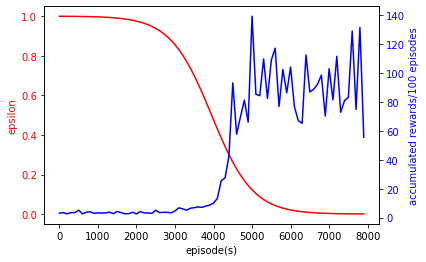

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 

fig, ax1 = plt.subplots() 
        
ax1.set_xlabel('episode(s)') 
ax1.set_ylabel('epsilon', color = 'red') 
ax1.plot(t2, exploration_rate, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('accumulated rewards/100 episodes', color = 'blue') 
ax2.plot(t2, accumulated_rewards, color = 'blue') 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
# Show plot
plt.show()

START STATE: (0, 0, 6, 3)
(0, 0, 6, 3)
state: (0, 0, 6, 3)
action selected: 1
reward: 0.0
(0, 0, 7, 3)
state: (0, 0, 7, 3)
action selected: 3
reward: 0.0019200871902449804
(0, 0, 7, 2)
state: (0, 0, 7, 2)
action selected: 3
reward: 7.240692982834674e-05
(0, 0, 7, 1)
state: (0, 0, 7, 1)
action selected: 1
reward: 9.979695112982972
(0, 0, 8, 1)
state: (0, 0, 8, 1)
action selected: 1
reward: 0.0
(0, 1, 8, 0)
state: (0, 1, 8, 0)
action selected: 0
reward: 0.0
(0, 1, 7, 0)
state: (0, 1, 7, 0)
action selected: 0
reward: 0.0
(0, 1, 6, 0)
state: (0, 1, 6, 0)
action selected: 0
reward: 0.0
(0, 1, 5, 0)
state: (0, 1, 5, 0)
action selected: 0
reward: 0.0
(0, 1, 4, 0)
state: (0, 1, 4, 0)
action selected: 0
reward: 0.0
(0, 1, 3, 0)
state: (0, 1, 3, 0)
action selected: 0
reward: 0.0
(0, 1, 2, 0)
state: (0, 1, 2, 0)
action selected: 0
reward: 0.0
(0, 1, 1, 0)
state: (0, 1, 1, 0)
action selected: 2
reward: 0.0

D:\Anaconda\lib\site-packages\keras\engine\training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,



(0, 1, 1, 1)
state: (0, 1, 1, 1)
action selected: 2
reward: 0.0
(0, 1, 2, 1)
state: (0, 1, 2, 1)
action selected: 0
reward: 0.0
(0, 1, 1, 1)
state: (0, 1, 1, 1)
action selected: 2
reward: 0.0
(0, 1, 1, 2)
state: (0, 1, 1, 2)
action selected: 0
reward: 0.0
(0, 1, 0, 2)
state: (0, 1, 0, 2)
action selected: 2
reward: 0.0
(0, 1, 0, 3)
state: (0, 1, 0, 3)
action selected: 2
reward: 0.0
(0, 1, 0, 4)
state: (0, 1, 0, 4)
action selected: 2
reward: 0.0
(0, 1, 0, 5)
state: (0, 1, 0, 5)
action selected: 2
reward: 0.0
(0, 1, 0, 6)
state: (0, 1, 0, 6)
action selected: 2
reward: 3.979312117660319e-12
(0, 1, 0, 7)
state: (0, 1, 0, 7)
action selected: 2
reward: 9.979168751707526
(0, 1, 0, 8)
state: (0, 1, 0, 8)
action selected: 1
reward: 0.0
(0, 0, 1, 8)
state: (0, 0, 1, 8)
action selected: 1
reward: 0.0
(0, 0, 2, 8)
state: (0, 0, 2, 8)
action selected: 2
reward: 0.0
(0, 0, 2, 9)
state: (0, 0, 2, 9)
action selected: 1
reward: 0.0
(0, 0, 2, 9)
state: (0, 0, 2, 9)
action selected: 1
reward: 0.0
(0, 0, 

reward: 0.13499951160727064
(0, 2, 0, 8)
state: (0, 2, 0, 8)
action selected: 1
reward: 0.1349321836998774
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 2
reward: 0.13499950576660033
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 3
reward: 0.13493218346761704
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 0
reward: 0.03859819541798383
(0, 2, 0, 8)
state: (0, 2, 0, 8)
action selected: 2
reward: 0.1351036246242905
(0, 2, 0, 9)
state: (0, 2, 0, 9)
action selected: 1
reward: 0.13503740032284078
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 3
reward: 0.13493276756063313
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 0
reward: 0.13499951160589171
(0, 2, 0, 8)
state: (0, 2, 0, 8)
action selected: 1
reward: 0.13493218369985863
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 2
reward: 0.13499950576660008
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 3
reward: 0.134932183467617
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 0
reward: 0.13499950576139774
(0, 2, 0, 8)
sta

reward: 0.0
(0, 1, 1, 3)
state: (0, 1, 1, 3)
action selected: 2
reward: 0.0
(0, 1, 1, 4)
state: (0, 1, 1, 4)
action selected: 2
reward: 0.0
(0, 1, 1, 5)
state: (0, 1, 1, 5)
action selected: 2
reward: 0.0
(0, 1, 1, 6)
state: (0, 1, 1, 6)
action selected: 2
reward: 1.511538271981039e-28
(0, 1, 1, 7)
state: (0, 1, 1, 7)
action selected: 2
reward: 9.9447658298931
(0, 1, 1, 8)
state: (0, 1, 1, 8)
action selected: 2
reward: 0.0
(0, 0, 1, 9)
state: (0, 0, 1, 9)
action selected: 1
reward: 0.0
(0, 0, 2, 9)
state: (0, 0, 2, 9)
action selected: 1
reward: 0.0
(0, 0, 3, 9)
state: (0, 0, 3, 9)
action selected: 1
reward: 0.0
(0, 0, 4, 9)
state: (0, 0, 4, 9)
action selected: 1
reward: 0.0
(0, 0, 5, 9)
state: (0, 0, 5, 9)
action selected: 1
reward: 0.0
(0, 0, 6, 9)
state: (0, 0, 6, 9)
action selected: 1
reward: 0.0
(0, 0, 6, 8)
state: (0, 0, 6, 8)
action selected: 1
reward: 0.0
(0, 0, 7, 8)
state: (0, 0, 7, 8)
action selected: 1
reward: 0.0
(0, 0, 8, 8)
state: (0, 0, 8, 8)
action selected: 3
reward: 0.

action selected: 0
reward: 0.0
(0, 2, 0, 6)
state: (0, 2, 0, 6)
action selected: 2
reward: 1.0996223563267638e-09
(0, 2, 0, 7)
state: (0, 2, 0, 7)
action selected: 3
reward: 0.0
(0, 2, 0, 6)
state: (0, 2, 0, 6)
action selected: 2
reward: 9.63964973030244e-12
(0, 2, 0, 7)
state: (0, 2, 0, 7)
action selected: 0
reward: 1.6483495667113636e-12
(0, 2, 0, 7)
state: (0, 2, 0, 7)
action selected: 0
reward: 8.375807654087061e-10
(0, 2, 0, 8)
state: (0, 2, 0, 8)
action selected: 2
reward: 1.1642979549214363e-09
(0, 2, 0, 9)
state: (0, 2, 0, 9)
action selected: 3
reward: 1.1640303647749136e-09
(0, 2, 0, 8)
state: (0, 2, 0, 8)
action selected: 3
reward: 2.4039343545694377e-12
(0, 2, 0, 7)
state: (0, 2, 0, 7)
action selected: 0
reward: 1.487088851532813e-12
(0, 2, 0, 7)
state: (0, 2, 0, 7)
action selected: 0
reward: 1.4666258956761174e-12
(0, 2, 0, 7)
state: (0, 2, 0, 7)
action selected: 0
reward: 1.4661707755550112e-12
(0, 2, 0, 7)
state: (0, 2, 0, 7)
action selected: 0
reward: 0.0
(0, 2, 0, 7)
st

action selected: 0
reward: 0.0
(0, 1, 8, 1)
state: (0, 1, 8, 1)
action selected: 0
reward: 0.0
(0, 1, 8, 2)
state: (0, 1, 8, 2)
action selected: 1
reward: 0.0
(0, 1, 9, 2)
state: (0, 1, 9, 2)
action selected: 0
reward: 0.0
(0, 1, 8, 2)
state: (0, 1, 8, 2)
action selected: 0
reward: 0.0
(0, 1, 7, 2)
state: (0, 1, 7, 2)
action selected: 3
reward: 0.0
(0, 1, 7, 1)
state: (0, 1, 7, 1)
action selected: 0
reward: 0.0
(0, 1, 6, 1)
state: (0, 1, 6, 1)
action selected: 0
reward: 0.0
(0, 1, 5, 1)
state: (0, 1, 5, 1)
action selected: 0
reward: 0.0
(0, 1, 4, 1)
state: (0, 1, 4, 1)
action selected: 0
reward: 0.0
(0, 1, 3, 1)
state: (0, 1, 3, 1)
action selected: 0
reward: 0.0
(0, 1, 2, 1)
state: (0, 1, 2, 1)
action selected: 0
reward: 0.0
(0, 1, 1, 1)
state: (0, 1, 1, 1)
action selected: 2
reward: 0.0
(0, 1, 1, 2)
state: (0, 1, 1, 2)
action selected: 2
reward: 0.0
(0, 1, 1, 3)
state: (0, 1, 1, 3)
action selected: 2
reward: 0.0
(0, 1, 2, 3)
state: (0, 1, 2, 3)
action selected: 0
reward: 0.0
(0, 2, 1,

reward: 0.0
(0, 1, 1, 3)
state: (0, 1, 1, 3)
action selected: 2
reward: 0.0
(0, 1, 1, 4)
state: (0, 1, 1, 4)
action selected: 2
reward: 0.0
(0, 1, 1, 5)
state: (0, 1, 1, 5)
action selected: 2
reward: 0.0
(0, 1, 1, 6)
state: (0, 1, 1, 6)
action selected: 2
reward: 0.0
(0, 1, 1, 7)
state: (0, 1, 1, 7)
action selected: 2
reward: 9.464025548470039
(0, 1, 1, 8)
state: (0, 1, 1, 8)
action selected: 2
reward: 0.0
(0, 0, 1, 9)
state: (0, 0, 1, 9)
action selected: 1
reward: 0.0
(0, 0, 2, 9)
state: (0, 0, 2, 9)
action selected: 2
reward: 0.0
(0, 0, 2, 9)
state: (0, 0, 2, 9)
action selected: 2
reward: 0.0
(0, 0, 2, 9)
state: (0, 0, 2, 9)
action selected: 2
reward: 0.0
(0, 0, 3, 9)
state: (0, 0, 3, 9)
action selected: 1
reward: 0.0
(0, 0, 4, 9)
state: (0, 0, 4, 9)
action selected: 1
reward: 0.0
(0, 0, 5, 9)
state: (0, 0, 5, 9)
action selected: 1
reward: 0.0
(0, 0, 6, 9)
state: (0, 0, 6, 9)
action selected: 1
reward: 0.0
(0, 0, 7, 9)
state: (0, 0, 7, 9)
action selected: 1
reward: 0.0
(0, 0, 8, 9)
s

reward: 0.0
(0, 2, 8, 0)
state: (0, 2, 8, 0)
action selected: 3
reward: 0.0
(0, 2, 8, 0)
state: (0, 2, 8, 0)
action selected: 3
reward: 0.0
(0, 2, 8, 0)
state: (0, 2, 8, 0)
action selected: 3
reward: 0.0
(0, 2, 8, 0)
state: (0, 2, 8, 0)
action selected: 3
reward: 0.0
(0, 2, 8, 0)
state: (0, 2, 8, 0)
action selected: 1
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9, 0)
action selected: 3
reward: 0.0
(0, 2, 9, 0)
state: (0, 2, 9

action selected: 2
reward: 0.0019500149787367114
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 3
reward: 2.4090903531624084e-06
(0, 2, 1, 7)
state: (0, 2, 1, 7)
action selected: 2
reward: 0.0018488754946585286
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 3
reward: 2.3981925840350184e-06
(0, 2, 1, 7)
state: (0, 2, 1, 7)
action selected: 2
reward: 0.0018491948648330855
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 3
reward: 2.405580432382782e-06
(0, 2, 1, 7)
state: (0, 2, 1, 7)
action selected: 2
reward: 0.0019499826418160411
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 3
reward: 2.409088285556103e-06
(0, 2, 1, 7)
state: (0, 2, 1, 7)
action selected: 2
reward: 0.0019500149690138094
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 3
reward: 2.409090347005494e-06
(0, 2, 1, 7)
state: (0, 2, 1, 7)
action selected: 2
reward: 0.0019500149787335143
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 3
reward: 2.409090348506734e-06
(0, 2, 1, 7)
state: (0, 2, 1, 7)
action selecte

reward: 0.1349317424348759
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 2
reward: 0.13499906450868923
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 3
reward: 0.13493174243487582
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 0
reward: 0.13499906450868923
(0, 2, 0, 8)
state: (0, 2, 0, 8)
action selected: 1
reward: 0.13493174243487577
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 2
reward: 0.1350989389371388
(0, 2, 0, 8)
state: (0, 2, 0, 8)
action selected: 2
reward: 0.1351031830312649
(0, 2, 0, 9)
state: (0, 2, 0, 9)
action selected: 1
reward: 0.13507635352308023
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 3
reward: 0.13493285122271417
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 0
reward: 0.13499908248604828
(0, 2, 0, 8)
state: (0, 2, 0, 8)
action selected: 1
reward: 0.13493174275936
accumulated_rewards_per_episode: 34.90218038021771
START STATE: (0, 0, 8, 7)
(0, 0, 8, 7)
state: (0, 0, 8, 7)
action selected: 1
reward: 0.0
(0, 0, 9, 7)
state: (0, 0, 9, 7)
acti

reward: 0.0
(0, 1, 1, 5)
state: (0, 1, 1, 5)
action selected: 2
reward: 0.0
(0, 1, 1, 6)
state: (0, 1, 1, 6)
action selected: 2
reward: 1.5188454985044538e-24
(0, 1, 1, 7)
state: (0, 1, 1, 7)
action selected: 2
reward: 9.979316338319741
(0, 1, 1, 8)
state: (0, 1, 1, 8)
action selected: 1
reward: 0.0
(0, 0, 2, 8)
state: (0, 0, 2, 8)
action selected: 1
reward: 0.0
(0, 0, 3, 8)
state: (0, 0, 3, 8)
action selected: 1
reward: 0.0
(0, 0, 3, 7)
state: (0, 0, 3, 7)
action selected: 2
reward: 0.0
(0, 0, 3, 8)
state: (0, 0, 3, 8)
action selected: 1
reward: 0.0
(0, 0, 4, 8)
state: (0, 0, 4, 8)
action selected: 1
reward: 0.0
(0, 0, 5, 8)
state: (0, 0, 5, 8)
action selected: 1
reward: 0.0
(0, 0, 6, 8)
state: (0, 0, 6, 8)
action selected: 1
reward: 0.0
(0, 0, 7, 8)
state: (0, 0, 7, 8)
action selected: 1
reward: 0.0
(0, 0, 8, 8)
state: (0, 0, 8, 8)
action selected: 3
reward: 0.0
(0, 0, 8, 7)
state: (0, 0, 8, 7)
action selected: 3
reward: 0.0
(0, 0, 9, 7)
state: (0, 0, 9, 7)
action selected: 3
reward:

reward: 0.214838017458405
(0, 2, 0, 9)
state: (0, 2, 0, 9)
action selected: 1
reward: 0.21483801745840503
(0, 2, 0, 9)
state: (0, 2, 0, 9)
action selected: 2
reward: 0.214838017458405
(0, 2, 0, 9)
state: (0, 2, 0, 9)
action selected: 1
reward: 0.21479411798112374
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 0
reward: 0.21483357988795998
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 2
reward: 0.21468013426368596
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 0
reward: 0.2148380174584051
(0, 2, 0, 9)
state: (0, 2, 0, 9)
action selected: 1
reward: 0.21483002535102114
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 0
reward: 0.21483801745840514
(0, 2, 0, 9)
state: (0, 2, 0, 9)
action selected: 1
reward: 0.21482986416395158
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 0
reward: 0.2148378609026257
(0, 2, 0, 9)
state: (0, 2, 0, 9)
action selected: 1
reward: 0.20841335929872998
(0, 2, 1, 9)
state: (0, 2, 1, 9)
action selected: 0
reward: 0.21483801745840522
(0, 2, 0, 9)
state

reward: 0.0
(0, 0, 4, 7)
state: (0, 0, 4, 7)
action selected: 2
reward: 0.0
(0, 0, 5, 7)
state: (0, 0, 5, 7)
action selected: 1
reward: 0.0
(0, 0, 6, 7)
state: (0, 0, 6, 7)
action selected: 0
reward: 0.0
(0, 2, 5, 7)
state: (0, 2, 5, 7)
action selected: 2
reward: 0.0
(0, 2, 5, 8)
state: (0, 2, 5, 8)
action selected: 3
reward: 0.0
(0, 2, 5, 7)
state: (0, 2, 5, 7)
action selected: 3
reward: 0.0
(0, 2, 5, 6)
state: (0, 2, 5, 6)
action selected: 0
reward: 0.0
(0, 2, 4, 6)
state: (0, 2, 4, 6)
action selected: 0
reward: 0.0
(0, 2, 3, 6)
state: (0, 2, 3, 6)
action selected: 0
reward: 0.0
(0, 2, 3, 7)
state: (0, 2, 3, 7)
action selected: 0
reward: 0.0
(0, 2, 2, 7)
state: (0, 2, 2, 7)
action selected: 0
reward: 0.0
(0, 2, 1, 7)
state: (0, 2, 1, 7)
action selected: 2
reward: 0.0
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 0
reward: 0.0
(0, 2, 0, 8)
state: (0, 2, 0, 8)
action selected: 1
reward: 0.0
(0, 2, 1, 8)
state: (0, 2, 1, 8)
action selected: 2
reward: 0.0
(0, 2, 1, 9)
state: (0, 2, 1

action selected: 3
reward: 0.0
(0, 2, 6, 4)
state: (0, 2, 6, 4)
action selected: 3
reward: 0.0
(0, 2, 6, 3)
state: (0, 2, 6, 3)
action selected: 1
reward: 0.0
(0, 2, 7, 3)
state: (0, 2, 7, 3)
action selected: 0
reward: 0.0
(0, 2, 6, 3)
state: (0, 2, 6, 3)
action selected: 1
reward: 0.0
(0, 2, 7, 3)
state: (0, 2, 7, 3)
action selected: 0
reward: 0.0
(0, 2, 6, 3)
state: (0, 2, 6, 3)
action selected: 3
reward: 0.0
(0, 2, 6, 2)
state: (0, 2, 6, 2)
action selected: 3
reward: 0.0
(0, 2, 5, 2)
state: (0, 2, 5, 2)
action selected: 0
reward: 0.0
(0, 2, 4, 2)
state: (0, 2, 4, 2)
action selected: 1
reward: 0.0
(0, 2, 5, 2)
state: (0, 2, 5, 2)
action selected: 0
reward: 0.0
(0, 2, 4, 2)
state: (0, 2, 4, 2)
action selected: 2
reward: 0.0
(0, 2, 4, 3)
state: (0, 2, 4, 3)
action selected: 1
reward: 0.0
(0, 2, 5, 3)
state: (0, 2, 5, 3)
action selected: 1
reward: 0.0
(0, 2, 6, 3)
state: (0, 2, 6, 3)
action selected: 3
reward: 0.0
(0, 2, 6, 2)
state: (0, 2, 6, 2)
action selected: 3
reward: 8.14760163296

action selected: 3
reward: 0.0
(0, 0, 8, 6)
state: (0, 0, 8, 6)
action selected: 3
reward: 0.0
(0, 0, 8, 5)
state: (0, 0, 8, 5)
action selected: 3
reward: 0.0
(0, 0, 8, 4)
state: (0, 0, 8, 4)
action selected: 3
reward: 0.0
(0, 0, 8, 3)
state: (0, 0, 8, 3)
action selected: 3
reward: 0.0
(0, 0, 9, 3)
state: (0, 0, 9, 3)
action selected: 3
reward: 0.0
(0, 0, 8, 3)
state: (0, 0, 8, 3)
action selected: 3
reward: 0.0
(0, 0, 8, 2)
state: (0, 0, 8, 2)
action selected: 3
reward: 9.482351109594362
(0, 0, 8, 1)
state: (0, 0, 8, 1)
action selected: 1
reward: 0.0
(0, 1, 9, 1)
state: (0, 1, 9, 1)
action selected: 0
reward: 0.0
(0, 1, 8, 1)
state: (0, 1, 8, 1)
action selected: 0
reward: 0.0
(0, 1, 7, 1)
state: (0, 1, 7, 1)
action selected: 0
reward: 0.0
(0, 1, 6, 1)
state: (0, 1, 6, 1)
action selected: 0
reward: 0.0
(0, 1, 5, 1)
state: (0, 1, 5, 1)
action selected: 0
reward: 0.0
(0, 1, 4, 1)
state: (0, 1, 4, 1)
action selected: 0
reward: 0.0
(0, 1, 3, 1)
state: (0, 1, 3, 1)
action selected: 0
reward:

reward: 0.0
(0, 0, 8, 7)
state: (0, 0, 8, 7)
action selected: 3
reward: 0.0
(0, 0, 8, 6)
state: (0, 0, 8, 6)
action selected: 3
reward: 0.0
(0, 0, 8, 5)
state: (0, 0, 8, 5)
action selected: 3
reward: 0.0
(0, 0, 8, 4)
state: (0, 0, 8, 4)
action selected: 3
reward: 0.0
(0, 0, 8, 3)
state: (0, 0, 8, 3)
action selected: 1
reward: 0.0
(0, 0, 9, 3)
state: (0, 0, 9, 3)
action selected: 3
reward: 0.00010692487123428923
(0, 0, 9, 2)
state: (0, 0, 9, 2)
action selected: 3
reward: 9.978339897969683
(0, 0, 9, 1)
state: (0, 0, 9, 1)
action selected: 0
reward: 0.0
(0, 1, 8, 1)
state: (0, 1, 8, 1)
action selected: 0
reward: 0.0
(0, 1, 7, 1)
state: (0, 1, 7, 1)
action selected: 0
reward: 0.0
(0, 1, 7, 0)
state: (0, 1, 7, 0)
action selected: 0
reward: 0.0
(0, 1, 6, 0)
state: (0, 1, 6, 0)
action selected: 0
reward: 0.0
(0, 1, 5, 0)
state: (0, 1, 5, 0)
action selected: 0
reward: 0.0
(0, 1, 5, 1)
state: (0, 1, 5, 1)
action selected: 0
reward: 0.0
(0, 1, 4, 1)
state: (0, 1, 4, 1)
action selected: 0
reward:

action selected: 3
reward: 0.00046664227999301366
(0, 0, 7, 2)
state: (0, 0, 7, 2)
action selected: 3
reward: 1.0371449093185887e-05
(0, 0, 7, 1)
state: (0, 0, 7, 1)
action selected: 1
reward: 9.951664094408022
(0, 0, 8, 1)
state: (0, 0, 8, 1)
action selected: 1
reward: 0.0
(0, 1, 9, 1)
state: (0, 1, 9, 1)
action selected: 0
reward: 0.0
(0, 1, 8, 1)
state: (0, 1, 8, 1)
action selected: 0
reward: 0.0
(0, 1, 7, 1)
state: (0, 1, 7, 1)
action selected: 0
reward: 0.0
(0, 1, 7, 0)
state: (0, 1, 7, 0)
action selected: 0
reward: 0.0
(0, 1, 6, 0)
state: (0, 1, 6, 0)
action selected: 0
reward: 0.0
(0, 1, 5, 0)
state: (0, 1, 5, 0)
action selected: 0
reward: 0.0
(0, 1, 4, 0)
state: (0, 1, 4, 0)
action selected: 0
reward: 0.0
(0, 1, 3, 0)
state: (0, 1, 3, 0)
action selected: 0
reward: 0.0
(0, 1, 2, 0)
state: (0, 1, 2, 0)
action selected: 0
reward: 0.0
(0, 1, 2, 1)
state: (0, 1, 2, 1)
action selected: 0
reward: 0.0
(0, 1, 1, 1)
state: (0, 1, 1, 1)
action selected: 2
reward: 0.0
(0, 1, 1, 2)
state: (

reward: 1.4309777628427602e-13
(0, 1, 1, 7)
state: (0, 1, 1, 7)
action selected: 2
reward: 9.975957684300027
accumulated_rewards_per_episode: 59.95136256854528


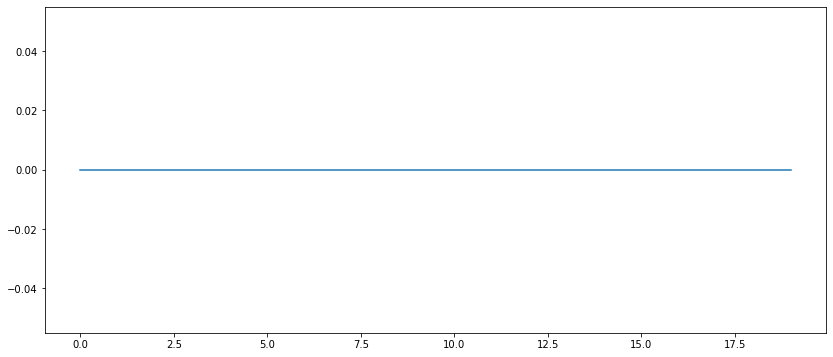

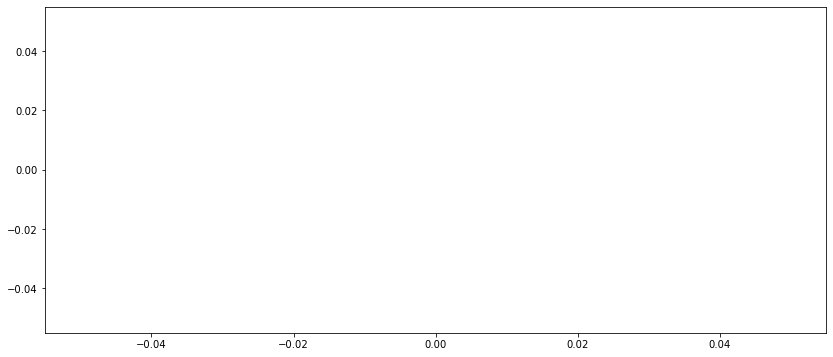

In [8]:
######### verify the dqn_cnn policy
'''
Parameters
----------
start : (r,c) = POMDP state
    The start state of the product POMDPs.

EPISODES : int
    The number of episodes.

num_steps : int 
    The episode length.

'''

from dqn_cnn import DQNAgent
EPISODES=20
num_steps=100

Path = []

gamma=0.99999
gammaB=0.9

# the defined belief_state size and action size
belief_state_size = np.shape(csrl.belief_state)
#action_size = np.shape(csrl.A)

# find the size of belief_state for np.reshape
prod_b_state_size = 1
for i in range(len(belief_state_size)):
    prod_b_state_size = prod_b_state_size * belief_state_size[i]
# find the size of action for np.reshape

# action size
#prod_action_size = csrl.shape[4]
prod_action_size = 4

agent = DQNAgent(prod_b_state_size, csrl.shape[2], csrl.shape[3], csrl.shape[1], prod_action_size, gamma, gammaB)
agent.load("./save/DQN_CNN_10_frontier.h5")
agent.epsilon = 0
done = False
num_episode_for_reward = 100 # print the accumulated reward per num of episode
# initialize the list for plot
accumulated_rewards=[]
exploration_rate=[]
accumulated_rewards_hundred_steps = []

for e in range(EPISODES):
    accumulated_rewards_per_episode=0
    done = False
    subpath = []

    pomdp_state = csrl.pomdp.random_state()
    while csrl.pomdp.label[pomdp_state[0],pomdp_state[1]] == ('c',) or csrl.pomdp.structure[(pomdp_state[0],pomdp_state[1])]=='B':
        #print('state in c and B, state is regenerated')
        pomdp_state = csrl.pomdp.random_state()
    #pomdp_state = (9, 7)

    state = (csrl.shape[0]-1,csrl.oa.q0)+(pomdp_state) # select the start product state
    print('START STATE: '+str(state))
    belief_state = csrl.belief_state # initialize the belief state
    
    csrl.track = [0,1] #self.initial_track # initialize frontier set = [0,1]
    ###print('begin new episode, self.track is reset')
    ###print('frontier reset as: [' + str(self.track)[1:-1] + ']')
    reshaped_reward = csrl.reshaped_reward_init
    ###print('begin new episode, reward is reset to initial reward')

    for step in range(num_steps):
        print(state)
        subpath.append(state)
        # reshape the belief state as the input to acquire the action
        input_b_state = np.reshape(belief_state,(1, csrl.shape[2], csrl.shape[3], csrl.shape[1]))
        print('state: '+str(state))
        #print('input_b_state: '+str(input_b_state))

        # verify the existence of action and select the action from the belief_state
        action_probs = agent.act_trained(input_b_state)
        action_probs = np.reshape(action_probs,(prod_action_size,1))
        #print('action_probs: '+str(action_probs))

        i = 0
        possible_actions = []
        for i in range(len(csrl.A[state])):
            possible_actions.append(action_probs[csrl.A[state][i]])
        action = csrl.A[state][np.argmax(possible_actions)]
        #print('possible_actions :'+str(possible_actions))
        print('action selected: '+str(action))

        ################## The agnet on POMDP simualtion

        # agent moves to the next state
        states, probs = csrl.transition_probs[state][action]
        next_state = states[np.random.choice(len(states),p=probs)]
        # find the observation states' list and the corresponding probabilities
        obsv_states, obsv_probs = csrl.pomdp.get_observation_prob(next_state[-2:])
        # observe the next state
        obsv_state = csrl.pomdp.generate_obsv_state(obsv_states, obsv_probs)

        ################## The belief_state update with the loops

        # temproraily store the current belief state
        current_belief_state = belief_state

        # multiply the transition probability matrix
        belief_state_after_transition = []
        for s in csrl.states():
            belief_state_after_transition.append(belief_state[s]*csrl.belief_transition_probs[s][action])
        belief_state_after_transition = sum(belief_state_after_transition)
        # update the belief state with the observation probability matrix
        updated_belief_state = belief_state_after_transition
        for s in csrl.states():
            updated_belief_state[s] = updated_belief_state[s]*csrl.belief_observation_probs[s][obsv_state[0], obsv_state[1]]
        belief_state = updated_belief_state/sum(sum(sum(sum(updated_belief_state))))

        ################# The training process
        
        # Update the frontier set + update reward setup accordingly
        reshaped_reward = csrl.Tf(state, next_state, reshaped_reward)
        ###print('frontier set: [' + str(csrl.track)[1:-1] + ']')
        
        # calculate the reward from the next belief state and find gamm
        reward = np.sum(np.reshape(belief_state,(1,prod_b_state_size))*reshaped_reward)

        state = next_state

        accumulated_rewards_per_episode = accumulated_rewards_per_episode + reward
        print('reward: '+str(reward))
    
    Path.append(subpath)
    
    print('accumulated_rewards_per_episode: '+str(accumulated_rewards_per_episode))
    accumulated_rewards.append(accumulated_rewards_per_episode)
    exploration_rate.append(agent.epsilon)

    if len(accumulated_rewards)>=num_episode_for_reward:
        accumulated_rewards_hundred_steps.append(np.average(accumulated_rewards))
        accumulated_rewards = []

import matplotlib.pyplot as plt
t1 = np.arange(0, EPISODES, 1)
t2 = np.arange(0, len(accumulated_rewards_hundred_steps)*num_episode_for_reward, num_episode_for_reward)

plt.figure(figsize=(14, 6))
display(plt.plot(t1, exploration_rate))

plt.figure(figsize=(14, 6))
display(plt.plot(t2, accumulated_rewards_hundred_steps))
#matplotlib.pyplot.scatter(len(accumulated_rewards_hundred_steps)*10, accumulated_rewards_hundred_steps, s=0.5)

In [9]:
import pylab as pl
from matplotlib.collections import LineCollection

size_x = 10
size_y = 10

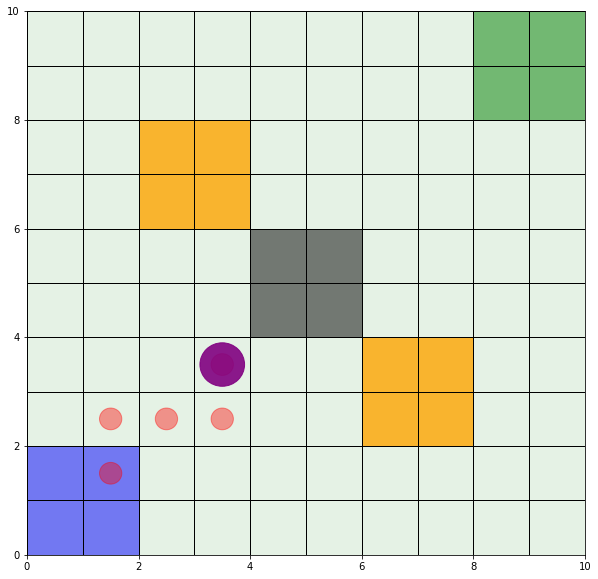

In [10]:
path = Path[0]

### plot the path on 'q0'.

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the Blocks
b_start_x = b_start_y = 4
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the Traps, 'c'
b_start_x = 2
b_start_y = 6
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

b_start_x = 6
b_start_y = 2
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

# plot the 'a's
b_start_x = b_start_y = 0
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b's
b_start_x = b_start_y = 8
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))    
        
for i in range(len(path)):
    if path[i][1]<=0:
        state_idx = path[i]
        ## convert state index in Julia to 'x,y' coordinates in python
        
        coord_x = path[i][3]
        coord_y = size_x-1-path[i][2]
        
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
        if i==0:
            # start point
            ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    else:
        break

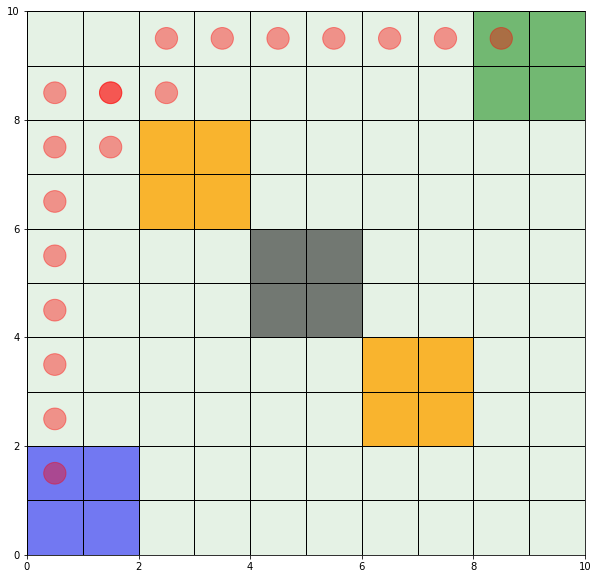

In [11]:
### plot the path on 'q1'.

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the Blocks
b_start_x = b_start_y = 4
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the Traps, 'c'
b_start_x = 2
b_start_y = 6
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

b_start_x = 6
b_start_y = 2
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

# plot the 'a's
b_start_x = b_start_y = 0
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b's
b_start_x = b_start_y = 8
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))    

ii=i
for i in range(ii, len(path)):
    if path[i][1]==1:
        state_idx = path[i]
        ## convert state index in Julia to 'x,y' coordinates in python
        coord_x = path[i][3]
        coord_y = size_x-1-path[i][2]
        
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
        if i==0:
            # start point
            ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    else:
        break

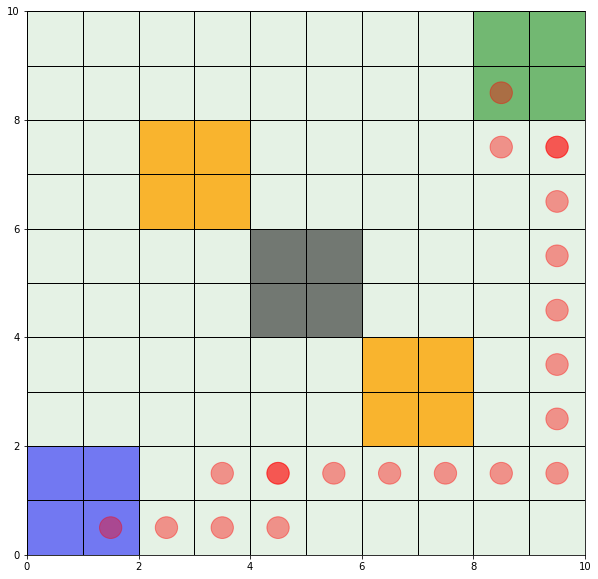

In [12]:
### plot again the path on 'q0'.

x = np.linspace(0,size_x,size_x+1)
y = np.linspace(0,size_y,size_y+1) 

pl.figure(figsize=(10,10))

hlines = np.column_stack(np.broadcast_arrays(x[0], y, x[-1], y))
vlines = np.column_stack(np.broadcast_arrays(x, y[0], x, y[-1]))
lines = np.concatenate([hlines, vlines]).reshape(-1, 2, 2)
line_collection = LineCollection(lines, color="black", linewidths=1)
ax = pl.gca()
ax.add_collection(line_collection)
ax.set_xlim(int(x[0]), int(x[-1]))
ax.set_ylim(int(y[0]), int(y[-1]))
# backgroud color
ax.add_patch(pl.Rectangle((0, 0), size_x, size_y, fill=True, color='green', alpha=.1))

# plot the Blocks
b_start_x = b_start_y = 4
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='black', alpha=.5))

# plot the Traps, 'c'
b_start_x = 2
b_start_y = 6
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

b_start_x = 6
b_start_y = 2
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='orange', alpha=.8))

# plot the 'a's
b_start_x = b_start_y = 0
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='blue', alpha=.5))

# plot the 'b's
b_start_x = b_start_y = 8
b_size_x = b_size_y = 2
ax.add_patch(pl.Rectangle((b_start_x, b_start_y), b_size_x, b_size_y, fill=True, color='green', alpha=.5))    

ii=i
for i in range(ii, len(path)):
    if path[i][1]<=0:
        state_idx = path[i]
        ## convert state index in Julia to 'x,y' coordinates in python
        coord_x = path[i][3]
        coord_y = size_x-1-path[i][2]
        
        ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.2, fill=True, color='red', alpha=.4))
        if i==0:
            # start point
            ax.add_patch(pl.Circle((coord_x+0.5, coord_y+0.5), 0.4, fill=True, color='purple', alpha=.9))
    else:
        break